#  Task 2 - Data Science - Prodigy InfoTech - Internship 

### Data set used : https://www.kaggle.com/competitions/titanic/data



# The Task is to " CLEAN DATA AND EDA " .

Diving into the data it turns out in the file "Gender Submission" the data Starts with the passenger number 892. Andd, there is no other innformation in gender_submission but, if you look into titanic2 file, the data starts with passenger 892 not having the survival column.

So, im going to merge both of them: 

In [64]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

gender_sub = pd.read_csv('gender_submission.csv')
titanic2 = pd.read_csv('titanic2.csv')
survived_for_titanic2 = gender_sub['Survived']
titanic2.insert(1, 'Survived' , survived_for_titanic2)
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Successfully merged the gender_submission's survived column in titanic2.
## now we need to actually make one dataframe that has all of the passsengers and their data accordingly for optimization. 

here we are going to do it :

In [59]:
titanic3 = pd.read_csv('titanic3.csv')
titanic3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
titanic_new= titanic3._append(titanic2, ignore_index=True)
titanic3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# df = pd.to_csv('titanic_new.csv', index=False)
titanic_new.to_csv('titanic_new.csv', index=False)
titanic_new

# Successfully merged the data into one CSV file 
## now we can start actual work, dig and analyse the data.

### 1) How many passengers were in the titanic?

In [ ]:
passengers_count = titanic_new['PassengerId'].count()
print(f"there were about {passengers_count} passengers in the titanic.")

there were about 1309 passengers in the titanic.


## 2)How many passengers were female, and how many were male?

In [ ]:
female_passengers_data=titanic_new[ titanic_new['Sex'] == "female" ]
female_passengers_count = female_passengers_data['PassengerId'].count()
print(f"there were about {female_passengers_count} females in the titanic")

there were about 466 females in the titanic


# 3) Age groups of women in titanic

In [ ]:
female_passengers_childern = female_passengers_data[(female_passengers_data['Age'] >= 0) & (female_passengers_data['Age'] < 5)]
female_passengers_kids = female_passengers_data[(female_passengers_data['Age'] > 4) & (female_passengers_data['Age'] < 13)]
female_passengers_teen = female_passengers_data[(female_passengers_data['Age'] > 12) & (female_passengers_data['Age'] < 20)]
female_passengers_adult = female_passengers_data[(female_passengers_data['Age'] > 19) & (female_passengers_data['Age'] < 40)]
female_passengers_madult = female_passengers_data[(female_passengers_data['Age'] > 39) & (female_passengers_data['Age'] < 60)]
female_passengers_old = female_passengers_data[female_passengers_data['Age'] > 59]


# female_passengers_teen

In [ ]:
female_passengers_childern_count = female_passengers_childern['PassengerId'].count()
female_passengers_kids_count = female_passengers_kids['PassengerId'].count()
female_passengers_teen_count = female_passengers_teen['PassengerId'].count()
female_passengers_adult_count = female_passengers_adult['PassengerId'].count()
female_passengers_madult_count = female_passengers_madult['PassengerId'].count()
female_passengers_old_count = female_passengers_old['PassengerId'].count()

In [ ]:
print("Number of female passengers who are children (age 0-12):", female_passengers_kids_count)
print("Number of female passengers who are teenagers (age 13-19):", female_passengers_teen_count)
print("Number of female passengers who are adults (age 20 and above):", female_passengers_adult_count)
print("Number of female passengers who are middle-aged adults (age 35-50):", female_passengers_madult_count)
print("Number of female passengers who are old-aged  (age > 50):", female_passengers_old_count)
adding = female_passengers_kids_count+female_passengers_adult_count+female_passengers_madult_count + female_passengers_childern_count+female_passengers_teen_count+female_passengers_old_count
print(adding)

Number of female passengers who are children (age 0-12): 20
Number of female passengers who are teenagers (age 13-19): 59
Number of female passengers who are adults (age 20 and above): 201
Number of female passengers who are middle-aged adults (age 35-50): 73
Number of female passengers who are old-aged  (age > 50): 11
388


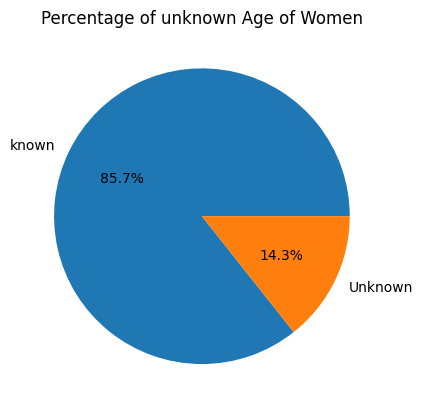

In [69]:
female_missing_age_count = female_passengers_count - adding
female_missing_age = np.array([female_passengers_count,female_missing_age_count])
lablesss = ["known" , "Unknown"]
plt.pie(female_missing_age, labels=lablesss, autopct='%1.1f%%')
plt.title("Percentage of unknown Age of Women")
plt.show()

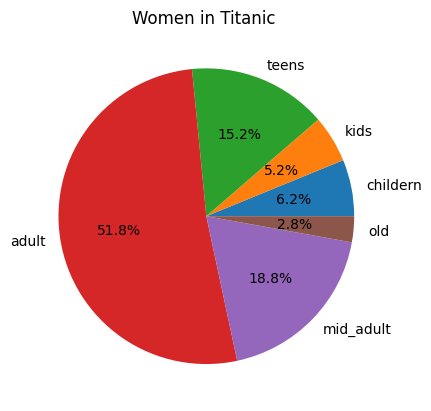

In [68]:
female_age_groups = np.array([female_passengers_childern_count,female_passengers_kids_count,female_passengers_teen_count,female_passengers_adult_count,female_passengers_madult_count,female_passengers_old_count])
labelss = ["childern","kids","teens","adult","mid_adult","old"]
plt.pie(female_age_groups, labels=labelss, autopct='%1.1f%%')
plt.title('Women in Titanic ')
plt.show()

# A notable revelation emergies,
## 14.3% of females have unknown ages. Furthermore, an intriguing discovery awaits—over half of the female passengers, precisely 51.8%, fall into the adult category.